In [1]:
import dill
import random
import numpy as np
voc = dill.load(open('/root/data1/ExpDrug-main/data/data_new/voc_final.pkl', 'rb'))
diag_voc, pro_voc, med_voc = voc['diag_voc'], voc['pro_voc'], voc['med_voc']

In [2]:
GAM = dill.load(open('/root/data1/ExpDrug-main/case/RASNet.pkl', 'rb'))
Mol = dill.load(open('/root/data1/ExpDrug-main/case/ExpDrug.pkl', 'rb'))
CGMR = dill.load(open('/root/data1/ExpDrug-main/case/DyMHGRec1.pkl', 'rb'))
Dy = dill.load(open('/root/data1/ExpDrug-main/case/DyMHGRec1.pkl', 'rb'))

In [3]:
Mol[776]

{'ja': 0.5198412698412699,
 'patient': [[[357, 248, 194, 412, 945, 212, 543, 1703, 1699, 1155, 296, 15],
   [146, 98],
   [4, 11, 3, 6, 18, 2, 13, 40, 16, 44, 19, 8, 0, 107]],
  [[357, 543, 237, 212],
   [146, 98],
   [4, 11, 3, 6, 18, 2, 13, 40, 16, 44, 19, 8, 0, 107]]],
 'y_label': [[0, 1, 2, 3, 4, 5, 6, 10, 11, 13, 15, 16, 21, 36, 37, 40],
  [0, 1, 2, 3, 4, 5, 6, 11, 13, 16, 18, 19, 21, 40, 46]],
 'output': [array([9.93889332e-01, 8.03952694e-01, 8.91401052e-01, 9.95531380e-01,
         9.12654877e-01, 9.14027572e-01, 9.47675765e-01, 6.40882598e-03,
         1.72841042e-01, 3.38110588e-02, 7.65567958e-01, 9.86228347e-01,
         1.40958026e-01, 9.21615183e-01, 1.32649109e-01, 9.46098745e-01,
         9.86710966e-01, 3.22522551e-01, 1.74419850e-01, 1.77469403e-01,
         1.82000473e-01, 8.19982648e-01, 5.16218657e-04, 3.13719437e-02,
         3.23219925e-01, 4.62566674e-01, 3.79996654e-03, 2.12257504e-02,
         2.21533388e-01, 3.84577201e-04, 2.24365573e-03, 5.25976233e-02,
   

In [4]:
GAM[776]

{'ja': 0.48923076923076925,
 'patient': [[[357, 248, 194, 412, 945, 212, 543, 1703, 1699, 1155, 296, 15],
   [146, 98],
   [4, 11, 3, 6, 18, 2, 13, 40, 16, 44, 19, 8, 0, 107]],
  [[357, 543, 237, 212], [146, 98], [3, 0, 2, 15, 13, 40, 16]]],
 'y_label': [[0,
   1,
   2,
   3,
   4,
   5,
   6,
   8,
   11,
   12,
   13,
   15,
   16,
   17,
   19,
   21,
   31,
   35,
   36,
   40,
   47,
   56],
  [0, 1, 2, 3, 4, 6, 11, 13, 15, 16, 21, 36, 40]],
 'output': [array([9.82383132e-01, 9.11431611e-01, 9.14593518e-01, 9.89554405e-01,
         9.22447681e-01, 5.95606923e-01, 9.47809935e-01, 8.70976299e-02,
         8.11696231e-01, 1.38002364e-02, 3.52932334e-01, 9.51399803e-01,
         7.34676838e-01, 8.91730070e-01, 4.23407787e-03, 8.40959847e-01,
         9.45706308e-01, 5.62932909e-01, 3.34962189e-01, 6.85254574e-01,
         1.38573766e-01, 9.81385767e-01, 1.41077889e-02, 1.21425897e-01,
         1.33023828e-01, 3.05020530e-02, 8.95732120e-02, 5.91362379e-02,
         3.62393022e-01, 3.0

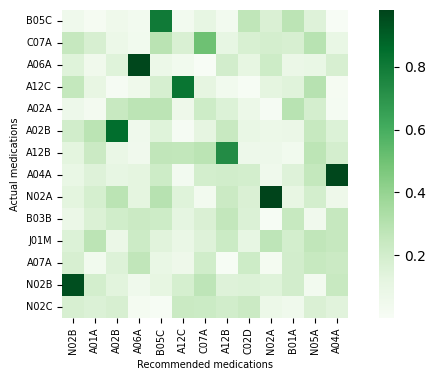

In [8]:
#RASNet模型的结果_推荐药物和真实药物间的热图
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = ['DejaVuSerif', 'SimHei']  # 默认字体 + 黑体

probability_ras= GAM[776]['output'][1]
# probability2[probability2 >= 0.5] = 1
index = np.where(probability_ras >= 0.5)[0]
# index2 = np.where(probability2 < 0.5)[0]
pro_matrix_ras = probability_ras[index]
# pro_matrix
real_med_ras = Mol[776]['patient'][1][2]
real_med = np.array(real_med_ras)
ras_read_pro = probability_ras[real_med]
p_label_ras = []
p_label_ras.append([med_voc.idx2word[k] for k in GAM[776]['y_label'][1]])
p_label_ras
r_label_ras = []
r_label_ras.append([med_voc.idx2word[k] for k in real_med])
len(r_label_ras[0])
# # 确定矩阵的大小
matrix_size_x = len(ras_read_pro)
matrix_size_y = len(pro_matrix_ras)
# # 创建一个全零矩阵
matrix_ras= np.zeros((matrix_size_x, matrix_size_y))
matrix_ras.shape
# # 填充矩阵
for j, true_label in enumerate(r_label_ras[0]):
    for i, pred_label in enumerate(p_label_ras[0]):
        if pred_label == true_label:
            matrix_ras[j, i] = pro_matrix_ras[i]
          
diagonal_matrix_ras = np.zeros((matrix_size_x, matrix_size_y))
diagonal_matrix_ras[:]= matrix_ras[:]
diagonal_matrix_ras[diagonal_matrix_ras == 0] = np.random.rand(np.sum(diagonal_matrix_ras == 0)) * 0.3

pivot_df = pd.DataFrame(diagonal_matrix_ras, index=r_label_ras[0], columns=p_label_ras[0])
# # 创建热图
plt.figure(figsize=(8, 4))
sns.heatmap(pivot_df, annot=False, cmap="Greens", fmt=".2f", square=True)

# 设置标题和标签
plt.xlabel('Recommended medications', fontsize=7)
plt.ylabel('Actual medications', fontsize=7)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.savefig("RASNet.png", dpi=300, bbox_inches='tight')
# 显示图表
plt.show()

In [5]:
import matplotlib.pyplot as plt

# 打印当前Matplotlib配置的默认字体
print(plt.rcParams['font.family'])

['sans-serif']


DyMHGRec

In [ ]:
import numpy as np
probability2 = Dy[776]['output'][1]
# probability2[probability2 >= 0.5] = 1
index = np.where(probability2 >= 0.5)[0]
index2 = np.where(probability2 < 0.5)[0]
pro_matrix = probability2[index]
# # sorted_pro = np.sort(pro_matrix)
# pro_matrix
probability2[index2]
# index 

In [183]:
#真实药物对应的概率 
pro_real_med = probability2[real_med]
#将其值改成不带指数的 
pro_real_med


array([0.9978613 , 0.9999994 , 0.9999999 , 0.9999993 , 1.        ,
       0.9999399 , 0.9999975 , 1.        , 1.        , 0.99993324,
       0.99999905, 0.99999964, 0.99999964, 0.00000461], dtype=float32)

In [190]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 给定的概率数组
# probabilities = np.array([
#     0.7609434 , 0.9995369 , 0.9999505 , 0.9999558 , 0.99996984,
#     0.9999975 , 0.99999917, 0.99999964, 0.99999976, 0.99999976,
#     0.9999999 , 0.9999999 , 1.        , 1.        , 1.        ,
#     1.        , 1.        , 1.        , 1.        , 1.
# ])

# 确定矩阵的大小
matrix_size = len(pro_matrix)

# 创建一个全零矩阵
matrix = np.zeros((matrix_size, matrix_size))

# 将概率数组的值赋给矩阵的对角线
np.fill_diagonal(matrix, pro_matrix)

# 填充非对角线元素，使其对称且值小于0.5
for i in range(matrix_size):
    for j in range(i + 1, matrix_size):
        # 生成一个随机值，确保其小于0.5
        random_value = np.random.rand() * 0.3
        matrix[i, j] = random_value
        matrix[j, i] = random_value
diagonal_matrix = np.zeros((matrix_size, matrix_size))
diagonal_matrix[:]= matrix[:]
print(diagonal_matrix)
# print(matrix.shape)
# # 绘制热图
# plt.figure(figsize=(10, 8))
# sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".4f", cbar=True)

# # 设置标题和标签
# plt.title('Symmetric Matrix with Given Diagonal Values and Random Symmetric Off-Diagonal Values < 0.5')
# plt.xlabel('Index')
# plt.ylabel('Index')

# # 显示图表
# plt.show()

[[0.99999964 0.22218804 0.20853313 0.01548277 0.02205816 0.27685036
  0.24316915 0.03628025 0.18527667 0.21685489 0.2038959  0.0296673
  0.15025446]
 [0.22218804 0.99993992 0.03372879 0.19582005 0.2838716  0.24978388
  0.23533237 0.14574889 0.09531811 0.29528963 0.01089212 0.2286274
  0.14345479]
 [0.20853313 0.03372879 0.99999988 0.07909216 0.02972681 0.14291253
  0.01085965 0.22978184 0.27376239 0.21556047 0.17786397 0.20965092
  0.14054928]
 [0.01548277 0.19582005 0.07909216 0.99786133 0.27029819 0.06793219
  0.18453264 0.14649749 0.11759163 0.28227784 0.27781299 0.21573672
  0.04566686]
 [0.02205816 0.2838716  0.02972681 0.27029819 0.99999928 0.28076774
  0.01840302 0.06372627 0.01173716 0.12672469 0.15356512 0.06864145
  0.01089654]
 [0.27685036 0.24978388 0.14291253 0.06793219 0.28076774 0.99999964
  0.17519678 0.22783174 0.08136435 0.12085314 0.20406108 0.28829947
  0.29909768]
 [0.24316915 0.23533237 0.01085965 0.18453264 0.01840302 0.17519678
  0.9999994  0.13566426 0.19983711

In [158]:
p_label = []
p_label.append([med_voc.idx2word[k] for k in Dy[776]['y_label'][1]])
p_label

[['N02B',
  'A02B',
  'A06A',
  'B05C',
  'A12C',
  'A07A',
  'C07A',
  'A12B',
  'N02A',
  'A02A',
  'J01M',
  'A04A',
  'B03B']]

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# # 已知模型推荐的药物组合的概率
# probabilities = np.array([
#     0.7609434 , 0.9995369 , 0.9999505 , 0.9999558 , 0.99996984,
#     0.9999975 , 0.99999917, 0.99999964, 0.99999976, 0.99999976,
#     0.9999999 , 0.9999999 , 1.        , 1.        , 1.        ,
#     1.        , 1.        , 1.        , 1.        , 1.        ]
# )
# diagonal_matrix = np.zeros((20, 20))
# diagonal_matrix[np.arange(20), np.arange(20)] = probabilities
# print(diagonal_matrix)
data = {
    'Medications in Visit 1': ['N02B', 'A02B', 'A06A', 'B05C', 'A12C', 'A07A', 'C07A', 'A12B', 'N02A', 'A02A', 'J01M', 'A04A', 'B03B'],
    'Recommended Medications for Visit 2': ['N02B', 'N02A', 'J01M', 'C07A', 'B05C', 'B03B', 'A12C', 'A12B', 'A07A', 'A06A', 'A04A', 'A02B', 'A02A'],
    'Recommended Probability': diagonal_matrix
    
}

df = pd.DataFrame({
    'Medications in Visit 1': data['Medications in Visit 1'] * len(data['Recommended Probability'][0]),
    'Recommended Medications for Visit 2': np.repeat(data['Medications in Visit 1'], len(data['Medications in Visit 1'])),
    'Probability': np.array(data['Recommended Probability']).flatten()
})
# 创建pivot table
pivot_df = df.pivot(index='Recommended Medications for Visit 2', columns='Medications in Visit 1', values='Probability')

# 填充缺失值为0
pivot_df = pivot_df.fillna(0)

# 绘制热图
plt.figure(figsize=(4, 4))
sns.heatmap(pivot_df, annot=False, cmap="Greens", fmt=".2f", square=True)

# 设置标签
plt.xlabel('ATC4', fontsize=7)
plt.ylabel('ATC4', fontsize=7)
# 设置刻度标签的字体大小为8pt
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

# 显示图形
plt.show()

NameError: name 'diagonal_matrix' is not defined

In [ ]:
choice = np.random.randint(0, 1059)

In [14]:
import matplotlib as mpl
print(mpl.get_cachedir())

/root/.cache/matplotlib


In [ ]:
CGMR[0]

{'ja': 0.5681818181818182, 'patient': [[[823, 67, 59, 20, 159, 51, 269, 7, 46, 68, 1558, 15, 78, 376], [5, 8, 40, 90, 160, 14], [3, 11, 0, 21, 25, 1, 28, 2, 46, 47, 63]], [[451, 1357, 20, 51, 269, 15, 7, 46, 577, 1264, 684, 174, 78, 159], [5, 155, 40, 14, 42, 90, 160, 179], [3, 11, 0, 21, 25, 1, 28, 2, 46, 47, 63]]], 'y_label': [[0, 1, 2, 3, 4, 6, 8, 11, 12, 13, 16, 18, 21, 24, 25, 37, 39, 40], [0, 1, 2, 3, 11, 21, 28, 46, 47]], 'ddi_rate': 0.1111111111111111, 'real_ddi': 0.16363636363636364}


In [ ]:
GAM[0]

{'ja': 0.6313131313131313, 'patient': [[[823, 67, 59, 20, 159, 51, 269, 7, 46, 68, 1558, 15, 78, 376], [5, 8, 40, 90, 160, 14], [3, 11, 0, 21, 25, 1, 28, 2, 46, 47, 63]], [[451, 1357, 20, 51, 269, 15, 7, 46, 577, 1264, 684, 174, 78, 159], [5, 155, 40, 14, 42, 90, 160, 179], [11, 0, 24, 21, 25, 3, 13, 1, 28]]], 'y_label': [[0, 1, 2, 3, 4, 6, 11, 12, 13, 16, 21, 24, 25, 28, 39], [0, 1, 2, 3, 6, 11, 13, 21, 24, 25, 28]], 'ddi_rate': 0.14545454545454545}


In [ ]:
Mol[0]

{'ja': 0.5220588235294118, 'patient': [[[823, 67, 59, 20, 159, 51, 269, 7, 46, 68, 1558, 15, 78, 376], [5, 8, 40, 90, 160, 14], [3, 11, 0, 21, 25, 1, 28, 2, 46, 47, 63]], [[451, 1357, 20, 51, 269, 15, 7, 46, 577, 1264, 684, 174, 78, 159], [5, 155, 40, 14, 42, 90, 160, 179], [3, 11, 0, 21, 25, 1, 28, 2, 46, 47, 63]]], 'y_label': [[0, 1, 3, 4, 6, 11, 12, 13, 18, 21, 24], [0, 1, 2, 3, 11, 21, 24, 28, 46, 47]], 'ddi_rate': 0.08888888888888889, 'real_ddi': 0.16363636363636364}


In [ ]:
mandata =[]
mandata.append([CGMR[0],GAM[0],Mol[0]])

In [ ]:
mandata

[[{'ja': 0.5681818181818182, 'patient': [[[823, 67, 59, 20, 159, 51, 269, 7, 46, 68, 1558, 15, 78, 376], [5, 8, 40, 90, 160, 14], [3, 11, 0, 21, 25, 1, 28, 2, 46, 47, 63]], [[451, 1357, 20, 51, 269, 15, 7, 46, 577, 1264, 684, 174, 78, 159], [5, 155, 40, 14, 42, 90, 160, 179], [3, 11, 0, 21, 25, 1, 28, 2, 46, 47, 63]]], 'y_label': [[0, 1, 2, 3, 4, 6, 8, 11, 12, 13, 16, 18, 21, 24, 25, 37, 39, 40], [0, 1, 2, 3, 11, 21, 28, 46, 47]], 'ddi_rate': 0.1111111111111111, 'real_ddi': 0.16363636363636364}, {'ja': 0.6313131313131313, 'patient': [[[823, 67, 59, 20, 159, 51, 269, 7, 46, 68, 1558, 15, 78, 376], [5, 8, 40, 90, 160, 14], [3, 11, 0, 21, 25, 1, 28, 2, 46, 47, 63]], [[451, 1357, 20, 51, 269, 15, 7, 46, 577, 1264, 684, 174, 78, 159], [5, 155, 40, 14, 42, 90, 160, 179], [11, 0, 24, 21, 25, 3, 13, 1, 28]]], 'y_label': [[0, 1, 2, 3, 4, 6, 11, 12, 13, 16, 21, 24, 25, 28, 39], [0, 1, 2, 3, 6, 11, 13, 21, 24, 25, 28]], 'ddi_rate': 0.14545454545454545}, {'ja': 0.5220588235294118, 'patient': [[[82

In [ ]:
cdata = []
cidex = []
clen = []
cddi = []
for choice in range(1059):
    cdata.append([CGMR[choice],GAM[choice],Mol[choice]])
    cidex.append(CGMR[choice]['ja'])
    cddi.append(CGMR[choice]['ddi_rate'])
    clen.append(len(CGMR[choice]['patient']))
indices_1 = [i for i, value in enumerate(cidex) if value > 0.8]
indices_2 = [i for i, value in enumerate(clen) if value == 5]
indices = list(set(indices_1) & set(indices_2))

In [ ]:
indices_1

[5, 8, 12, 19, 23, 24, 27, 33, 39, 43, 44, 45, 53, 64, 75, 84, 86, 91, 110, 121, 122, 125, 133, 138, 139, 142, 150, 169, 179, 191, 192, 193, 194, 197, 200, 216, 217, 221, 226, 240, 245, 249, 250, 255, 263, 271, 274, 279, 281, 285, 292, 311, 320, 323, 324, 333, 341, 354, 356, 364, 369, 371, 372, 380, 386, 387, 390, 398, 400, 401, 407, 412, 416, 419, 427, 429, 434, 435, 444, 448, 461, 467, 471, 476, 482, 488, 490, 494, 496, 497, 507, 515, 548, 554, 555, 567, 572, 584, 587, 589, 599, 601, 608, 609, 610, 622, 632, 634, 638, 640, 657, 659, 669, 675, 680, 684, 685, 690, 692, 693, 696, 705, 736, 745, 747, 767, 777, 778, 779, 785, 794, 798, 799, 805, 831, 840, 844, 845, 846, 853, 854, 860, 863, 866, 867, 869, 885, 895, 908, 909, 918, 920, 926, 928, 935, 938, 955, 959, 973, 975, 978, 980, 988, 991, 992, 994, 1007, 1009, 1031, 1033, 1036, 1038]


In [ ]:
cdata[0]

[{'ja': 0.5681818181818182, 'patient': [[[823, 67, 59, 20, 159, 51, 269, 7, 46, 68, 1558, 15, 78, 376], [5, 8, 40, 90, 160, 14], [3, 11, 0, 21, 25, 1, 28, 2, 46, 47, 63]], [[451, 1357, 20, 51, 269, 15, 7, 46, 577, 1264, 684, 174, 78, 159], [5, 155, 40, 14, 42, 90, 160, 179], [3, 11, 0, 21, 25, 1, 28, 2, 46, 47, 63]]], 'y_label': [[0, 1, 2, 3, 4, 6, 8, 11, 12, 13, 16, 18, 21, 24, 25, 37, 39, 40], [0, 1, 2, 3, 11, 21, 28, 46, 47]], 'ddi_rate': 0.1111111111111111, 'real_ddi': 0.16363636363636364}, {'ja': 0.6313131313131313, 'patient': [[[823, 67, 59, 20, 159, 51, 269, 7, 46, 68, 1558, 15, 78, 376], [5, 8, 40, 90, 160, 14], [3, 11, 0, 21, 25, 1, 28, 2, 46, 47, 63]], [[451, 1357, 20, 51, 269, 15, 7, 46, 577, 1264, 684, 174, 78, 159], [5, 155, 40, 14, 42, 90, 160, 179], [11, 0, 24, 21, 25, 3, 13, 1, 28]]], 'y_label': [[0, 1, 2, 3, 4, 6, 11, 12, 13, 16, 21, 24, 25, 28, 39], [0, 1, 2, 3, 6, 11, 13, 21, 24, 25, 28]], 'ddi_rate': 0.14545454545454545}, {'ja': 0.5220588235294118, 'patient': [[[823

In [ ]:
indices = list(set(indices_1) & set(indices_2))
print(indices)

[386, 994, 197, 75, 684, 398, 271, 401, 690, 1009, 372, 341, 407]


In [ ]:
CGMR[197]

{'ja': 0.8509615384615385, 'patient': [[[19, 464, 73, 54, 688, 18, 262, 660, 122, 178, 367, 631, 77, 4, 614, 642, 15, 61, 851], [267], [1, 2, 6, 8, 11, 0, 18, 21, 12, 4, 3, 40, 43, 16, 56, 61, 63, 17, 42, 26, 13, 33, 84, 31, 7, 77]], [[862, 140, 54, 75, 3, 15, 262, 268, 396, 60, 122, 367, 631, 614, 77, 4, 178, 37, 49, 605, 61, 198], [495], [1, 2, 6, 8, 11, 0, 18, 21, 12, 4, 3, 40, 43, 16, 56, 61, 63, 17, 42, 26, 13, 33, 84, 31, 7, 77]], [[464, 54, 268, 18, 262, 122, 178, 367, 61, 4, 614, 15], [213, 214, 55], [1, 2, 6, 8, 11, 0, 18, 21, 12, 4, 3, 40, 43, 16, 56, 61, 63, 17, 42, 26, 13, 33, 84, 31, 7, 77]], [[19, 464, 54, 1858, 272, 18, 4, 304, 345, 262, 77, 614, 633, 156, 15, 851, 296], [669], [1, 2, 6, 8, 11, 0, 18, 21, 12, 4, 3, 40, 43, 16, 56, 61, 63, 17, 42, 26, 13, 33, 84, 31, 7, 77]], [[19, 464, 54, 15, 18, 268, 614, 178, 69, 384, 1292], [213, 83], [1, 2, 6, 8, 11, 0, 18, 21, 12, 4, 3, 40, 43, 16, 56, 61, 63, 17, 42, 26, 13, 33, 84, 31, 7, 77]]], 'y_label': [[0, 1, 2, 3, 4, 5, 6, 

In [ ]:
CGMR[994]['patient'][0][2]

[4, 5, 6, 10, 11, 0, 12, 18, 21, 2, 29, 34, 1, 3, 27, 40, 28, 47, 16, 50, 43, 31, 56, 8, 72, 48, 19, 95, 65, 25, 66, 17, 37, 57]


In [ ]:
CGMR[197]['patient'][4][2]

[1, 2, 6, 8, 11, 0, 18, 21, 12, 4, 3, 40, 43, 16, 56, 61, 63, 17, 42, 26, 13, 33, 84, 31, 7, 77]


In [ ]:
CGMR[197]['y_label'][4]

[0, 1, 2, 3, 4, 6, 7, 8, 11, 12, 13, 16, 17, 18, 21, 26, 31, 40, 43, 56, 61, 63, 77, 84]


In [ ]:
data = [cdata[i] for i in indices]

In [ ]:
data

[[{'ja': 0.8428571428571429, 'patient': [[[150, 13, 539, 23, 54, 292, 380, 332, 44, 155, 246, 556, 46, 542, 40, 69, 710, 4, 1151, 693, 164, 937, 603, 117, 557], [2], [5, 4, 6, 9, 11, 3, 0, 2, 30, 1, 36, 35, 15, 13, 40, 16, 8, 72, 56, 19, 65, 21, 34, 28, 37, 17, 10]], [[194, 17, 73, 54, 105, 438, 254, 103, 442, 276, 647, 4, 556, 1151, 693, 187, 460, 557], [18], [5, 4, 6, 9, 11, 3, 0, 2, 30, 1, 36, 35, 15, 13, 40, 16, 8, 72, 56, 19, 65, 21, 34, 28, 37, 17, 10]], [[699, 1396, 13, 33, 194, 105, 630, 15, 619, 7, 254, 103, 40, 491, 37, 455, 4, 1151, 937, 164, 692, 693], [751, 753, 794, 156, 2], [5, 4, 6, 9, 11, 3, 0, 2, 30, 1, 36, 35, 15, 13, 40, 16, 8, 72, 56, 19, 65, 21, 34, 28, 37, 17, 10]], [[718, 13, 54, 194, 203, 84, 539, 105, 16, 332, 184, 556, 254, 103, 276, 647, 438, 205, 7, 40, 442, 1151, 187, 164, 61, 937, 557, 460, 117, 3], [7, 55, 46, 18, 160], [5, 4, 6, 9, 11, 3, 0, 2, 30, 1, 36, 35, 15, 13, 40, 16, 8, 72, 56, 19, 65, 21, 34, 28, 37, 17, 10]], [[258, 13, 848, 1495, 54, 699, 664

In [ ]:
def compare_lists(listA, listB):
    common_elements = [item for item in listA if item in listB]
    unique_elements_in_B = [item for item in listB if item not in listA]
    unique_elements_in_A = [item for item in listA if item not in listB]
    return common_elements, unique_elements_in_B, unique_elements_in_A

In [ ]:
real_label = []
predict_label = []
correct = []
incorrect = []
unseen = []
ddi = []
jaccard = []
for j in range(len(data)):
    for i in range(len(data[j])):
        real_label.append([med_voc.idx2word[k] for k in sorted(data[j][i]['patient'][0][2])])
        predict_label.append([med_voc.idx2word[k] for k in data[j][i]['y_label'][0]])
        correct_, incorrect_, unseen_ = compare_lists([med_voc.idx2word[k] for k in sorted(data[j][i]['patient'][0][2])], [med_voc.idx2word[k] for k in data[j][i]['y_label'][0]])
        correct.append(correct_)
        incorrect.append(incorrect_)
        unseen.append(unseen_)
        ddi.append(data[j][i]['ddi_rate'])
        jaccard.append(data[j][i]['ja'])

In [ ]:
def compare(real_label, predict_label, correct, incorrect, unseen):
    m = 0
    for j in range(len(data)):
        for i in range(len(data[j])):
            A = len(real_label[m])
            B = len(predict_label[m])
            c = len(correct[m])
            d = len(incorrect[m])
            e = len(unseen[m])
            print("DDI",ddi[m])
            
            print("ja",jaccard[m])
            print("correct {}/{}; incorrect {}/{}; unseen {}/{};".format(c,A,d,B,e,A))
            print("Diagnosis:",[diag_voc.idx2word[k] for k in sorted(data[j][i]['patient'][0][0])])
            print("real drug:",[med_voc.idx2word[k] for k in sorted(data[j][i]['patient'][0][2])])
            print("predict drug:",predict_label[m])
            m = m + 1
            print("-------------------------------------------------------------------")
            

In [ ]:
compare(real_label, predict_label, correct, incorrect, unseen)

DDI 0.05413105413105413
ja 0.8428571428571429
correct 16/27; incorrect 5/21; unseen 11/27;
Diagnosis: ['311', '5849', '1122', '2449', '78039', '4019', '4254', '53081', 'E8798', '5609', '28529', 'V1251', '2800', '2930', '99931', '2536', '1179', '7291', '9092', 'E8792', 'V454', 'V153', '72402', 'V1204', 'V1043']
real drug: ['N02B', 'A01A', 'A02B', 'A06A', 'B05C', 'A12A', 'A12C', 'A07A', 'M01A', 'N01A', 'C07A', 'A12B', 'C02D', 'N02A', 'N06A', 'J01M', 'B01A', 'C09A', 'H03A', 'J01X', 'N03A', 'N05A', 'C08C', 'A04A', 'D04A', 'J02A', 'J01E']
predict drug: ['N02B', 'A01A', 'A02B', 'A06A', 'B05C', 'A12A', 'A12C', 'A07A', 'C07A', 'C03C', 'A12B', 'N02A', 'A02A', 'J01M', 'B01A', 'J01D', 'N03A', 'N05A', 'A04A', 'R03A', 'N05B']
-------------------------------------------------------------------
DDI 0.08496732026143791
ja 0.4665782493368701
correct 15/27; incorrect 2/17; unseen 12/27;
Diagnosis: ['311', '5849', '1122', '2449', '78039', '4019', '4254', '53081', 'E8798', '5609', '28529', 'V1251', '2800'

当前模型DyMHGRec的案例分析

In [ ]:
import dill
import random
data = dill.load(open('/root/data1/ExpDrug-main/case/DyMHGRec.pkl', 'rb'))
voc = dill.load(open('/root/data1/ExpDrug-main/data/data_new/voc_final.pkl', 'rb'))
diag_voc, pro_voc, med_voc = voc['diag_voc'], voc['pro_voc'], voc['med_voc']

In [ ]:
#为测试结果按照Jaccard排序，定义函数 (不用修改)
bdata = sorted(data.items(), reverse=True)
cdata = []
for i in range(len(bdata)):
    cdata.append(bdata[i])
def compare_lists(listA, listB):
    common_elements = [item for item in listA if item in listB]
    unique_elements_in_B = [item for item in listB if item not in listA]
    unique_elements_in_A = [item for item in listA if item not in listB]
    return common_elements, unique_elements_in_B, unique_elements_in_A
real_label = []
predict_label = []
correct = []
incorrect = []
unseen = []
for i in range(len(bdata)):
    real_label.append([med_voc.idx2word[j] for j in sorted(cdata[i][1]['patient'][0][2])])
    predict_label.append([med_voc.idx2word[j] for j in cdata[i][1]['y_label'][0]])
    correct_, incorrect_, unseen_ = compare_lists([med_voc.idx2word[j] for j in sorted(cdata[i][1]['patient'][0][2])], [med_voc.idx2word[j] for j in cdata[i][1]['y_label'][0]])
    correct.append(correct_)
    incorrect.append(incorrect_)
    unseen.append(unseen_)

In [ ]:
real_label[0]

['A01A', 'A02B', 'A06A', 'B05C', 'A12C', 'C01C', 'C07A', 'C03C', 'A12B', 'B01A', 'C01B', 'C01A', 'C09C', 'C03B']


In [ ]:
# len(bdata[0][1]['patient'])
predict_label

[['N02B', 'A01A', 'A02B', 'A06A', 'B05C', 'A12A', 'A12C', 'A07A', 'C07A', 'C03C', 'A12B', 'N02A', 'J01M', 'B01A', 'J01D', 'N05A', 'A04A', 'R03A', 'N05B'], ['N02B', 'A01A', 'A02B', 'A06A', 'B05C', 'A12A', 'A12C', 'A07A', 'C03C', 'A12B', 'N02A', 'N06A', 'J01M', 'N05C', 'J01D', 'B02B', 'N05A', 'A04A', 'B03B', 'N05B', 'C03D', 'H01C'], ['N02B', 'A01A', 'A02B', 'A06A', 'B05C', 'A12A', 'A12C', 'C01C', 'A07A', 'C07A', 'C03C', 'A12B', 'N02A', 'A02A', 'J01M', 'B01A', 'C10A', 'C01B', 'J01D', 'N05A', 'A04A', 'R03A', 'R05C', 'R01A'], ['N02B', 'A01A', 'A02B', 'A06A', 'B05C', 'A12C', 'A07A', 'C07A', 'C03C', 'A12B', 'N02A', 'A02A', 'B01A', 'J01D', 'N05A', 'A04A', 'R03A', 'D04A'], ['N02B', 'A01A', 'A02B', 'A06A', 'B05C', 'A12A', 'A12C', 'C01C', 'A07A', 'N01A', 'C07A', 'C03C', 'A12B', 'C02D', 'N02A', 'N06A', 'A02A', 'J01M', 'B01A', 'C01B', 'N05C', 'D01A', 'J01D', 'B02B', 'J01X', 'N05A', 'A04A', 'R03A', 'N05B', 'A03F', 'D04A', 'V03A', 'J01C'], ['N02B', 'A01A', 'A02B', 'A06A', 'B05C', 'A12A', 'A12C', 'A07

In [ ]:
data_path = "/root/data1/ExpDrug-main/data/data_new/records_final_131.pkl"
data = dill.load(open(data_path, "rb"))
split_point = int(len(data) * 2 / 3)
data_train = data[:split_point]
eval_len = int(len(data[split_point:]) / 2)
data_test = data[split_point : split_point + eval_len]
data_eval = data[split_point + eval_len :]

real_patient = data_eval
print(real_patient[994])

[[[93, 73, 34, 228, 32, 92, 33, 75, 457, 96, 1, 325, 224, 94, 832, 46, 139, 1255, 345, 3, 330], [191, 18, 2, 61, 290, 48, 282, 234, 38, 137, 39], [4, 5, 6, 10, 11, 0, 12, 18, 21, 2, 29, 34, 1, 3, 27, 40, 28, 47, 16, 50, 43, 31, 56, 8, 72, 48, 19, 95, 65, 25, 66, 17, 37, 57]], [[155, 34, 922, 84, 1179, 281, 283, 19, 1, 832, 790, 46, 230, 184, 3], [48, 18], [0, 2, 5, 6, 11, 4, 21, 34, 1, 3, 27, 40, 19, 55, 36, 74, 31, 10, 16, 50, 13, 57]], [[93, 29, 283, 389, 75, 1, 35, 230, 790, 49, 390, 832, 177], [46, 282, 775, 234], [4, 5, 6, 8, 11, 0, 12, 21, 2, 31, 1, 3, 13, 40, 51, 43, 56, 47, 53, 71, 16, 34, 29, 57]], [[1800, 655, 32, 75, 389, 33, 551, 93, 35, 228, 1, 938, 922, 290, 622, 191, 832, 900, 69, 82, 37, 390, 87, 470, 1301, 865, 866, 4], [452, 59, 196, 744, 184, 412, 220, 307, 425, 1426, 79, 234, 64, 46, 137, 247, 433, 11, 12, 50, 39, 38, 60], [0, 1, 4, 5, 6, 7, 8, 10, 11, 3, 12, 21, 2, 31, 36, 13, 27, 40, 43, 17, 47, 49, 50, 51, 16, 56, 29, 26, 18, 79, 48, 41, 19, 95, 97, 87, 72]], [[2

[[[93, 73, 34, 228, 32, 92, 33, 75, 457, 96, 1, 325, 224, 94, 832, 46, 139, 1255, 345, 3, 330], [191, 18, 2, 61, 290, 48, 282, 234, 38, 137, 39], [4, 5, 6, 10, 11, 0, 12, 18, 21, 2, 29, 34, 1, 3, 27, 40, 28, 47, 16, 50, 43, 31, 56, 8, 72, 48, 19, 95, 65, 25, 66, 17, 37, 57]], [[155, 34, 922, 84, 1179, 281, 283, 19, 1, 832, 790, 46, 230, 184, 3], [48, 18], [4, 5, 6, 10, 11, 0, 12, 18, 21, 2, 29, 34, 1, 3, 27, 40, 28, 47, 16, 50, 43, 31, 56, 8, 72, 48, 19, 95, 65, 25, 66, 17, 37, 57]], [[93, 29, 283, 389, 75, 1, 35, 230, 790, 49, 390, 832, 177], [46, 282, 775, 234], [4, 5, 6, 10, 11, 0, 12, 18, 21, 2, 29, 34, 1, 3, 27, 40, 28, 47, 16, 50, 43, 31, 56, 8, 72, 48, 19, 95, 65, 25, 66, 17, 37, 57]], [[1800, 655, 32, 75, 389, 33, 551, 93, 35, 228, 1, 938, 922, 290, 622, 191, 832, 900, 69, 82, 37, 390, 87, 470, 1301, 865, 866, 4], [452, 59, 196, 744, 184, 412, 220, 307, 425, 1426, 79, 234, 64, 46, 137, 247, 433, 11, 12, 50, 39, 38, 60], [4, 5, 6, 10, 11, 0, 12, 18, 21, 2, 29, 34, 1, 3, 27, 40, 28, 47, 16, 50, 43, 31, 56, 8, 72, 48, 19, 95, 65, 25, 66, 17, 37, 57]], [[274, 34, 283, 922, 593, 389, 1, 1179, 94, 832, 790, 117], [2, 290, 48, 82, 376], [4, 5, 6, 10, 11, 0, 12, 18, 21, 2, 29, 34, 1, 3, 27, 40, 28, 47, 16, 50, 43, 31, 56, 8, 72, 48, 19, 95, 65, 25, 66, 17, 37, 57]]], 'y_label': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 18, 19, 21, 26, 27, 29, 31, 32, 36, 40, 43, 47, 51, 79], [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 16, 17, 18, 19, 21, 27, 28, 29, 31, 34, 37, 40, 43, 47, 48, 50, 56, 57, 65, 66, 72], [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 16, 17, 18, 19, 21, 27, 28, 29, 31, 34, 37, 40, 43, 47, 48, 50, 56, 57, 65, 66, 72], [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 16, 17, 18, 19, 21, 27, 28, 29, 31, 34, 37, 40, 43, 47, 48, 50, 56, 57, 65, 66, 72], [0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 16, 17, 18, 19, 21, 27, 28, 29, 31, 34, 37, 40, 43, 47, 48, 50, 56, 57, 65, 66, 72]]

In [ ]:
#选择Jaccard排名多少位的结果进行展示，不用太好，不然不可信
def compare(real_label, predict_label, correct, incorrect, unseen):
    #在这里修改位次
    # for i in range(20,26):
    for i in range(0,1):
        A = len(real_label[i])
        B = len(predict_label[i])
        c = len(correct[i])
        d = len(incorrect[i])
        e = len(unseen[i])
        print("correct {}/{}; incorrect {}/{}; unseen {}/{};".format(c,A,d,B,e,A))
        print("Diagnosis:",[diag_voc.idx2word[j] for j in sorted(cdata[i][1]['patient'][0][0])])
        print("real drug:",[med_voc.idx2word[j] for j in sorted(cdata[i][1]['patient'][0][2])])
        print("predict drug:",predict_label[i])

In [ ]:
#统计总的正确率、错误率、未预测到率
correct_score = []
unseen_score = []
incorrect_score = []
for i in range(len(cdata)):
    correct_score.append(len(correct[i])/len(real_label[i]))
    unseen_score.append(len(unseen[i])/len(real_label[i]))
    incorrect_score.append(len(incorrect[i])/len(predict_label[i]))
sum(correct_score)/len(correct_score),sum(unseen_score)/len(unseen_score),sum(incorrect_score)/len(incorrect_score)

In [ ]:
#展示预测结果
compare(real_label, predict_label, correct, incorrect, unseen)

correct 9/14; incorrect 10/19; unseen 5/14;
Diagnosis: ['5849', '4280', '42731', '4254', 'V5861', '53081', '2763', '56400', '4168', '2768', 'V422', '42823', '78729']
real drug: ['A01A', 'A02B', 'A06A', 'B05C', 'A12C', 'C01C', 'C07A', 'C03C', 'A12B', 'B01A', 'C01B', 'C01A', 'C09C', 'C03B']
predict drug: ['N02B', 'A01A', 'A02B', 'A06A', 'B05C', 'A12A', 'A12C', 'A07A', 'C07A', 'C03C', 'A12B', 'N02A', 'J01M', 'B01A', 'J01D', 'N05A', 'A04A', 'R03A', 'N05B']
